## import

In [2]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


## initialization
pix
x0                      y [0 - 255]
x1
x2
x3
x4
x5
x6
x7


<!-- 
red:
x1 x2 x3
x4 y  x5
x6 x7 x8 
-->

In [3]:
# variables
features = 8
y = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32,[None,features])
w = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros(1))

# functions
pred = tf.matmul(x, w) + b 
loss = tf.reduce_mean(tf.pow(pred - y, 2))
alfa = 0.000001
update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)

## data function

In [4]:
def get_XY_from_image(photo_name:str,color:int,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])}")
    for i in range(1,len(color_arr)-1):
        for j in range(1,len(color_arr[0])-1):
            temp_y = [color_arr[i][j]]
            temp_x = [color_arr[i-1][j-1],color_arr[i-1][j],color_arr[i][j-1],color_arr[i+1][j],color_arr[i][j+1],color_arr[i+1][j+1],color_arr[i-1][j+1],color_arr[i+1][j-1]]
            data_y.append(temp_y)
            data_x.append(temp_x)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return (data_x,data_y)

## get data

In [5]:
data_x , data_y = get_XY_from_image("balloon.jpg",0)
data_t_x , data_t_y = get_XY_from_image("cat.jpg",0)
# data_x = np.append(data_x,data_t_x,axis=0)
# data_y = np.append(data_y,data_t_y,axis=0)
# data_x = np.array(data_x)
# data_y = np.array(data_y)

pic size: 480x720
pic size: 576x1024


## running the sim

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
show = 10
loss_in_time = []
w_arr = []
test_over_time = []
for i in range(0,10000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>100):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w))
              print(f"i = {i}, loss = {tmp}")
              
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))
              #  w = {sess.run(w)}, b = {sess.run(b)},


i = 110, loss = 417.07537841796875
i = 120, loss = 414.552734375
i = 130, loss = 412.05584716796875
i = 140, loss = 409.5843505859375
i = 150, loss = 407.1381530761719
i = 160, loss = 404.7167663574219
i = 170, loss = 402.3200988769531
i = 180, loss = 399.9478759765625
i = 190, loss = 397.5997619628906
i = 200, loss = 395.2756652832031
i = 210, loss = 392.9751281738281
i = 220, loss = 390.697998046875
i = 230, loss = 388.444091796875
i = 240, loss = 386.213134765625
i = 250, loss = 384.00494384765625
i = 260, loss = 381.819091796875
i = 270, loss = 379.6555480957031
i = 280, loss = 377.5140380859375
i = 290, loss = 375.3943176269531
i = 300, loss = 373.29608154296875
i = 310, loss = 371.2192077636719
i = 320, loss = 369.16351318359375
i = 330, loss = 367.1286315917969
i = 340, loss = 365.1144714355469
i = 350, loss = 363.1208190917969
i = 360, loss = 361.14739990234375
i = 370, loss = 359.194091796875
i = 380, loss = 357.2606201171875
i = 390, loss = 355.3467102050781
i = 400, loss = 3

## printing and testing

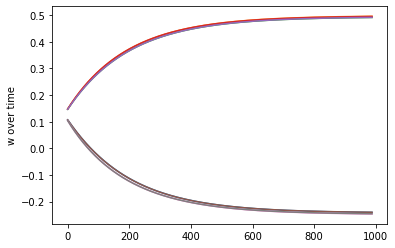

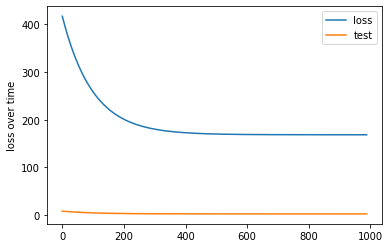

In [7]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

# data_x , data_y = get_XY_from_image("cat.jpg",0)

# print(f"loss test: {sess.run(loss,feed_dict={x:data_x,y:data_y})}")

# print(f"w = {sess.run(w)}")
# print(f"b = {sess.run(b)} ")
# print(f"predict = {np.matmul([5,15,10],sess.run(w))+sess.run(b)}")